# Beschreibende Statistik

auch *deskriptive* oder *empirische* Statistik

## Übersicht
- Warum Statistik

#### <span style="color:blue">Lagemaß</span>
#### Streuung
#### Graphiken
#### Abhängigkeit

# Beschreibende Statistik

### Daten oft komplex

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
# we have some data x (from below...)
print('data x is a {} and has {} values of {}'.format(type(x), x.shape, x.dtype))
c = int(len(x)/2)
print('x = {} ...'.format(x[:16]))
print('... {} ...'.format(x[c-8:c+8]))
print('... {}    '.format(x[-16:]))

data x is a <class 'numpy.ndarray'> and has (3136,) values of int64
x = [128 128 128 128 127 126 126 126 126 128 129 130 131 131 129 127] ...
... [134 146 150 147 139 131 124 120 120 122 127 135 143 148 147 139] ...
... [125 128 131 132 132 130 128 127 126 125 126 126 127 128 128 128]    


### Graphik

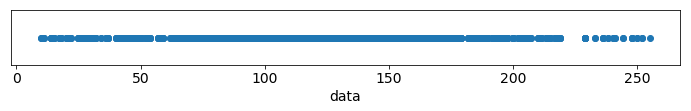

In [6]:
'''occurence of data values'''
fig = plt.figure(figsize=(12,1))            # create long graph
plt.scatter(x, np.zeros_like(x))            # draw dots along x-axis (y=0)
fig.gca().get_yaxis().set_visible(False)    # switch off y-axis numbers
plt.xlabel('data');                         # label: suppress object

### Datenreduktion

... auf einige Kenngrößen:

- Lagemaß
- Streuung
- Verteilung

#### Finde wichtige Information
#### Ohne relevante Information zu verlieren

image shape = 56x56
[120 122 127 135 143 148 147 139 124 105  89  81  88 110 142 177 202 207
 187 145  91  43  15  20  58 119 185 236 255 236 185 119  58  20  15  43
  91 145 187 207 202 177 142 110  88  81  89 105 124 139 147 148 143 135
 127 122] linescan


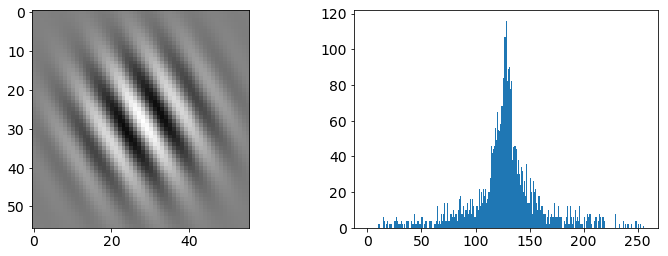

In [4]:
'''load data of an example image "Gabor-patch"
   show histogram
   This is the source of the data from above... '''
from matplotlib import image as mpi           # image related routines

img = mpi.imread('data/gabor.png')            # read image data from file
fig = plt.figure(figsize=(12, 4))             # rect canvas 12x4 inches
fig.add_subplot(1, 2, 1)                      # 1 row, 2 columns: 1st graph = image
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')  # the pixel image

fig.add_subplot(1, 2, 2)                      # 1 row, 2 columns: 2nd sub-graph = hist
imgvector3D = np.array(img)                   # convert colors to values in matrix
lenx, leny = imgvector3D.shape[:2]            # width x height [x colors]
print('image shape = {}x{}'.format(lenx, leny))
# take first color (R), round to 8Bit integer, flatten x and y
x = np.rint(255*np.reshape(imgvector3D[:,:,0],lenx*leny)).astype(int)  
plt.hist(x, bins=np.linspace(0, 256, 256+1)) # histogram with 1Bit-bins
print('{} linescan'.format(x[int(lenx/2)*leny:int(lenx/2+1)*leny])) # a (middle) line scan

In [7]:
np.histogram?

# Lagemaß

## Modus
Der Wert, der am häufigsten vorkommt
- Es kann mehrere Modi geben
- Modus kann atypisch sein

In [8]:
nmax = 0
for i in range(256):
    n = x[x==i].shape[0]
    if n > nmax:
        nmax = n
        imax = i
print('the modus of data x is {} and has {} values'.format(imax, nmax))

the modus of data x is 128 and has 116 values


#### Nachteil:
- Modus kann Randwerte annehmen
- Es kann zwei oder mehr Modi geben ("*multimodale Verteilung*")

## Median 

- Mindestens eine Hälfte der Werte ist kleiner gleich
- mindestens eine Hälfte der Werte größer gleich

In der sortierten Liste aller Daten $x_{(i)}$ mit $i \in\{1\dots n\}$ und $x_{(1)}\leq \dots \leq x_{(N)}$ ist der Median 

$$\tilde{x} = \begin{cases}
x_{(\frac{N+1}{2})}  & \qquad N \; \text{ungerade} \\
\frac{1}{2}(x_{(\frac{N}{2})}+x_{(\frac{N}{2}+1)}) & \qquad N \; \text{gerade}
\end{cases}$$

### Minimale Betrags-Abweichung
Sei $f(t) = \sum_{i=1}^N|x_i-t|$

dann gilt $f(t) =  \sum_{i=1}^N|x_i-t| \geq \sum_{i=1}^N|x_i-\tilde{x}| = f(\tilde{x}) \quad \forall t\in \mathbb{R} $

x schlange: Median

**Beweis** (für ungerade $N=2k+1$):

> - $x_(i)$ d.h. $x$ ist sortiert.
> - $x_i$ d.h. $x$ ist nicht sortiert.

$\sum_{i=1}^N|x_i-\tilde{x}| = \sum_{i=1}^N|x_{(i)}-\tilde{x}|$

$ \quad = \tilde{x}-x_{(1)}+\dots+\tilde{x}-x_{(k-1)}\;+\;x_{(k+1)}-\tilde{x}+\dots+x_{(N)}-\tilde{x}$

$ \quad = -x_{(1)}-\dots-x_{(k-1)}\;+\;x_{(k+1)}+\dots+x_{(N)}$

$ \quad = t-x_{(1)}+\dots+t-x_{(k-1)}\;+\;x_{(k+1)}-t+\dots+x_{(N)}-t$

$ \quad \leq |t-x_{(1)}|+\dots+|t-x_{(k-1)}|\;+\;|t-x_{(k)}|\;+\;|x_{(k+1)}-t|+\dots+|x_{(N)}-t|$

$ \quad = |x_{(1)}-t|+\dots+|x_{(k-1)}-t|\;+\;|x_{(k)}-t|\;+\;|x_{(k+1)}-t|+\dots+|x_{(N)}-t|$

$ \quad = \sum_{i=1}^N|x_{(i)}-t|$
$ \quad = \sum_{i=1}^N|x_{i}-t|$

### Median unter linearer Transformation

<br>

$$y = ax + b \qquad \Rightarrow \qquad \tilde{y} = a\tilde{x} + b$$

### Wie den Median berechnen?
*numpy* stellt die Funktion <tt>median()</tt> bereit.

In [9]:
xmedian = np.median(x)                    # <== numpy calculates the median
print('Median = {:.3f}'.format(xmedian))  # (three meaningful digits)

Median = 127.000


median=127.0000 between x(1567)=127.0000 and x(1568)=127.0000


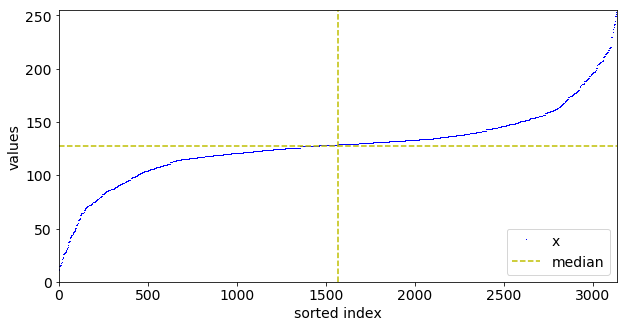

In [11]:
'''sorted data - values vs index'''
xsorted=np.sort(x[:])                               # sort by numpy; ':' makes copy
medx = np.median(xsorted)                           # the median of sorted data
n = len(xsorted)                                    # how many values?
n1 = int(np.round(n/2.-1))                          # highest index under
n2 = int(np.round(n/2.))                            # lowest index above median
print('median={:.4f} between x({})={:.4f} and x({})={:.4f}'.
      format(medx, n1, xsorted[n1], n2, xsorted[n2]))
indices = np.arange(n)                              # array of index numbers

fig = plt.figure(figsize=(10,5))                    # wide canvas
plt.plot( indices, xsorted, 'b,', label='x')        # at each value-point step upward 1
plt.xlabel('sorted index')
plt.ylabel('values')
plt.plot((0, n), 2*[medx], 'y--', label='median')   # include the median in x-
plt.plot(2*[.5*n], (0., xsorted[-1]), 'y--')        #                   and y-direction
plt.axis((0, n, 0, x.max()))                        # restrict area to full data range
plt.legend(loc='lower right');

median=127.0000 between x(1567)=127.0000 and x(1568)=127.0000


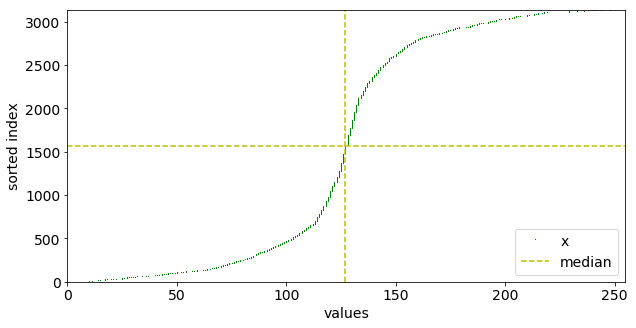

In [12]:
'''sorted data - index vs value'''
# same data as above
print('median={:.4f} between x({})={:.4f} and x({})={:.4f}'.
      format(medx, n1, xsorted[n1], n2, xsorted[n2]))

fig = plt.figure(figsize=(10,5))                    # wide canvas
plt.plot( xsorted, indices, 'g,', label='x')        # x-axis now really x-values; y-axis has indices
plt.ylabel('sorted index')
plt.xlabel('values')
plt.plot(2*[medx], (0, n), 'y--', label='median')   # include the median in y-
plt.plot((0., xsorted[-1]), 2*[.5*n], 'y--')        #                   and x-direction
plt.axis((0, x.max(), 0, n))                        # restrict area to full data range
plt.legend(loc='lower right');

# Mittelwerte

## Arithmetisches Mittel

Gegeben seien $i=\{1\dots N\}$ Werte $x_i$, dann ist deren <div class="alert alert-block alert-success">arithmetisches Mittel
$$\bar{x} = \frac{1}{N}\sum_{i=1}^Nx_i$$
</div>

#### Beispiel
Gewicht der Personen im Fahrstuhl
- Wären alle gleich schwer, wie groß ist dieser Durchschnitt?

### Minimale quadratische Abweichung

Sei $f(t) = \sum_{i=1}^N(x_i-t)^2$

dann gilt $f(t) \geq f(\bar{x}) \quad \forall \quad t\in \mathbb{R} $

最小方差

#### Beweis:

$f(t) = \sum_{i=1}^N[(x_i-\bar{x})+(\bar{x}-t)]^2)$<br>

$\quad = \sum_{i=1}^N(x_i-\bar{x})^2 + 2\sum_{i=1}^N(\bar{x}-t)(x_i-\bar{x}) + \sum_{i=1}^N(\bar{x}-t)^2$<br>

$\quad = \sum_{i=1}^N(x_i-\bar{x})^2 + 2(\bar{x}-t)\sum_{i=1}^N(x_i-\bar{x}) + (\bar{x}-t)^2 \sum_{i=1}^{N}1$<br>

$\quad = f(\bar{x}) + 0 + n(\bar{x}-t)^2$<br>

$\quad \geq f(\bar{x})$

### Wie den Mittelwert berechnen?
- *numpy-ndarray* hat die Methode ` .mean()`
- *numpy* hat die Funktion ` np.mean()`

mean   of x = 127.36575
median of x = 127.00000


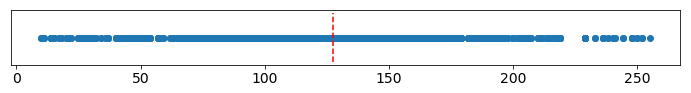

In [13]:
fig = plt.figure(figsize=(12,1))
plt.scatter(x, np.zeros_like(x), label='x')
xmean = x.mean()
print('mean   of x = {:.5f}'.format(xmean))
print('median of x = {:.5f}'.format(xmedian))
plt.plot(2*[xmean], [-.5, .5], 'r--', label='mean')
fig.gca().get_yaxis().set_visible(False);    # switch off y-axis numbers

### Lineare Transformation 
Das arithmetische Mittel transformiert sich ebenso wie die Daten unter einer linearen Transformation:
$$y_i = ax_i + b \qquad \Rightarrow \qquad \bar{y} = a\bar{x} + b$$

#### Beweis:
[ÜA]

### Summe von Mittelwerten
Gegeben seien $N$ Werte $x_i$ mit Mittelwert $\bar{x}$ und $M$ Werte $y_j$ mit Mittelwert  $\bar{y}$ . Dann ist das gemeinsame arithmetische Mittel
$$\bar{z} = \frac{1}{N+M}(N\cdot \bar{x} + M\cdot \bar{y})$$
im allgemeinen $\neq \frac{1}{2}(\bar{x}+\bar{y})$
#### Beweis
[ÜA]

### Merkwürdiges Beispiel
Wenn beide Teilmittelwerte kleiner werden, wird das gemeinsame Mittel auch kleiner?


Die Einkommen aller $N$ Einwohner in Stadt A $\;a_i \; i\in\{1..N\}$ <br>
seien niedriger als diejenigen der $M$ Einwohner in Stadt B mit $\;b_j \; j\in\{1..M\}$:<br>
$a_i < b_j \quad \forall i, j$

#### Der Reichste aus A zieht nach B
- Das Durchschnittseinkommen in A wird kleiner
- Das Durchschnittseinkommen in B wird kleiner

Aber
- Das Durchschnittseinkommen alle Einwohner in beiden Städten zusammen bleibt gleich!

### Anwendung
- *herkömmlicher* Mittelwert 
    - $N*\bar{x} = \sum x_i$
- Sanfte Berücksichtigung der "Fehler" um den Mittelwert
- Starke Berücksichtigung der weit außen liegenden "Fehler"

## Andere Mittelwerte

#### Beispiel Preissteigerung
Die Inflation beschreibt die jährliche Preissteigerung bei etwa gleichbleibendem Warenkorb. Als Referenz wird ein Jahr festgelegt und darauf auf 100% normiert.
<img src="images/destatis_inflation_bis2016.png" width="50%">
Quelle: [destatis.de](https://www.destatis.de/DE/ZahlenFakten/GesamtwirtschaftUmwelt/Preise/Verbraucherpreisindizes/Tabellen_/VerbraucherpreiseKategorien.html)


- Index[Jahr]
- Rate[Jahr] = Index[Jahr] / Index[Jahr-1]
- Steigerung = (Rate - 1) x 100 %

#years= 27 , difference= 26 years, total ratio = +55.698%
mean yearly growth rate = 1.723%


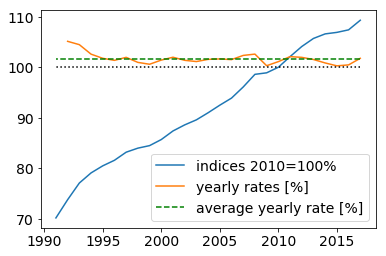

In [14]:
import pandas as pd                                         # Pandas handles data conveniently
inflation = pd.read_table('data/inflation_de.dat', sep=' +', 
                          header=None, engine='python')     # separator allows reg-expressions: 1+
years = np.asarray(inflation[0])                            # first column: years
indices = np.asarray(inflation[1])                          # second column: total inflation rates 
plt.plot(years, indices, label='indices 2010=100%')         #    relativ to 2010 = 100%
print('#years= {} , difference= {} years, total ratio = +{:.3f}%'.format(
        len(years), years[0]-years[-1], 100*(indices[0]/indices[-1]-1.)) )
# calculate single rates every year
rates = np.asarray([indices[j]/indices[j+1] for j, ind in enumerate(indices[:-1])])
plt.plot(years[:-1], 100*rates, label='yearly rates [%]')
ratemean = rates.mean()-1.                                  # mean of yearly growing rates
print('mean yearly growth rate = {:.3f}%'.format(100*ratemean))
plt.plot([years[0], years[-1]], 2*[100*(1+ratemean)], 'g--', label='average yearly rate [%]')
plt.plot([years[0], years[-1]], 2*[100], 'k:')  # base line: no change=100% of previous year
plt.legend(loc='lower right');

#### Test
$\text{Index}[2017] = \text{Index}[1990] \cdot \text{mittlereRate}^{26}$

In [15]:
print('from index[1990] = {} with {} times a rate of {}' 
      .format(indices[-1], years[0]-years[-1], rates.mean()))
print('leads to index[{}] of {}'
      .format(years[0], indices[-1]*rates.mean()**(years[0]-years[-1])))
print('but in [{}] should be {}'.format(years[0], indices[0]))

from index[1990] = 70.2 with 26 times a rate of 1.0172322892824832
leads to index[2017] of 109.46131973108793
but in [2017] should be 109.3


### mittlere Steigerung?

Sei der Ausgangswert $p_0$ und die **Rate** im i-ten Intervall zum vorherigen $x_i=\frac{p_i}{p_{i-1}}$, dann gilt bis zum Intervall $n$<br>
$p_0\cdot x_1\cdot x_2\cdot \dotsc \cdot x_n = p_0 \cdot \frac{p_1}{p_0} \cdot \frac{p_2}{p_1} \cdot \dotsc \cdot \frac{p_n}{p_{n-1}} = p_n$

Gesucht ist die mittlere Wachstumsrate $w$, so daß gilt<br>
$p_0\cdot w^n = p_n$<br>
beziehungsweise<br>
$x_1\cdot\dotsc\cdot x_n = w^n$



Dann ist $w$, die mittlere Wachstumsrate, das *geometrische Mittel* der einzelnen Wachstumsraten.

## Geometrisches Mittel
$$\bar{x}_{geom} = \sqrt[N]{x_1\cdot x_2 \cdot \dotsc\cdot x_N} = \left( \prod_{i=1}^N x_i\right) ^{\frac{1}{N}}$$

In [16]:
m0 = rates.mean()
print('arithmetic mean = {:.5f}%'.format(100*(m0-1)))

import scipy.stats                         # contains geometric mean and lots of statistics...
m2 = scipy.stats.gmean(rates)
print('geometric mean  = {:.5f}% by scipy.stats.gmean()'.format(100*(m2-1)))

arithmetic mean = 1.72323%
geometric mean  = 1.71746% by scipy.stats.gmean()


In [17]:
print('The real data in {} is                                      {}'
      .format(years[0], indices[0]))
print('Starting with {} in {} the arithmetic mean {:.6f} gives {:.2f} in {}'
      .format(indices[-1], years[-1], m0, indices[-1]*(m0)**(years[0]-years[-1]), years[0]))
print('Starting with {} in {} the geometric  mean {:.6f} gives {:.2f} in {}'
      .format(indices[-1], years[-1], m2, indices[-1]*(m2)**(years[0]-years[-1]), years[0]))

The real data in 2017 is                                      109.3
Starting with 70.2 in 1991 the arithmetic mean 1.017232 gives 109.46 in 2017
Starting with 70.2 in 1991 the geometric  mean 1.017175 gives 109.30 in 2017


### Ein weiteres *Gegen*-Beispiel
Jeden Tag tanken für 20€ bei sich ändernden Preisen. Welches ist der durchschnittliche Preis?

Man erhält 
- bei einem Preis von $e$ €/l
- für 20€
- $l=\frac{20}{e}$ Liter.

In [18]:
d = 10                      # number of days
fixedeuros = 20.            # amount in Eur
ppl = np.array([1.64, 1.62, 1.30, 1.49, 1.50, 1.58, 1.45, 1.38, 1.30, 1.34])  # prices
liters = fixedeuros/ppl
totaleuros = d*fixedeuros
totalliters = liters.sum()
print('total liters bought: {:.4f} and total money {:.2f}EUR spent'.format(totalliters, totaleuros))
print('makes an average price of {:.4f} €/l'.format(totaleuros/totalliters))
print('arithmetic mean: {:.4f} €/l'.format(ppl.mean()))
print('geometric mean: {:.4f} €/l'.format(scipy.stats.gmean(ppl)))

total liters bought: 137.9356 and total money 200.00EUR spent
makes an average price of 1.4500 €/l
arithmetic mean: 1.4600 €/l
geometric mean: 1.4550 €/l


## harmonisches Mittel

<br>

$$\bar{x}_{harm} = \frac{1}{\frac{1}{N} \sum_{i=1}^N \frac{1}{x_i}}$$

- Sinnvoll bei Verhältniszahlen
- kann durchaus extremere Unterschiede zeigen wie im Beispiel<br>
$x=\{1, 4, 4\}$ mit *arithmetischem* Mittel $3$ und *harmonischem* Mittel $2$

In [19]:
print('harmonic mean: {:.4f} €/l'.format(scipy.stats.hmean(ppl)))

harmonic mean: 1.4500 €/l


### Anwendung Elektronik: Parallelschaltung von Widerständen
Ohmsches Gesetz: $R=\frac{U}{I}$, bei gleicher Spannung $U$ addieren sich die Stromstärken $I$

$$R_{parallel} = \frac{U}{I_1+I_2+\dots+I_n} = \frac{U}{\frac{U}{R_1}+\dots+\frac{U}{R_n}} = \frac{1}{\frac{1}{R_1}+\dots+\frac{1}{R_n}}$$

## Mittelwerte im Vergleich

<br>

$$x_{min} \leq \bar{x}_{harm} \leq \bar{x}_{geom} \leq \bar{x}_{arithm} \leq x_{max} $$

## Zusammenfassung

Der Mittelwert liefert **eine** wichtige Kennzahl für die Daten
- Modus
$$x_i\;:\quad h_i \geq h_j\quad \forall j$$
- Median
$$\tilde{x} = x_{(\frac{N+1}{2})} \qquad (N \; \text{ungerade})$$
- arithmetisches Mittel
$$\bar{x} = \frac{1}{N}\sum_{i=1}^Nx_i$$
- geometrisches Mittel
$$\bar{x}_{geom} = \sqrt[N]{x_1\cdot x_2 \cdot \dotsc\cdot x_N}$$
- harmonisches Mittel
$$\bar{x}_{harm} = \frac{1}{\frac{1}{N} \sum_{i=1}^N \frac{1}{x_i}}$$

# Fragen?